In [85]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

0.7095808383233533

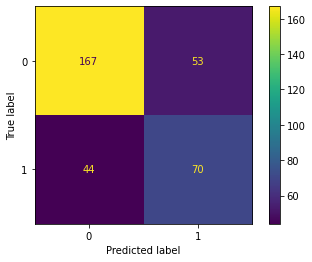

In [86]:
# Prepare the data
df = pd.read_csv("cleaned.csv")

df["#_of_wins"] = df["#_of_wins"].apply(lambda x : 1 if (x >= 1) else 0)
variable_columns = [c for c in df.columns if c not in "#_of_wins, title"]

X = df.loc[:, variable_columns]
y = df.loc[:, "#_of_wins"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=38)

clf = tree.DecisionTreeClassifier(class_weight="balanced")
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)

accuracy_score(y_test_pred, y_test)